# Предобработка данных

## Задание 2.1

In [68]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
import math 
import seaborn as sns

In [3]:
data = pd.read_csv('train.csv', low_memory = False)
data.head()

,ticket_id,agency_name,inspector_name,violator_name,violation_street_number,violation_street_name,violation_zip_code,mailing_address_str_number,mailing_address_str_name,city,...,clean_up_cost,judgment_amount,payment_amount,balance_due,payment_date,payment_status,collection_status,grafitti_status,compliance_detail,compliance
0,22056,"Buildings, Safety Engineering & Env Department","Sims, Martinzie","INVESTMENT INC., MIDWEST MORTGAGE",2900.0,TYLER,NaN,3.0,S. WICKER,CHICAGO,...,0.0,305.0,0.0,305.0,NaN,NO PAYMENT APPLIED,NaN,NaN,non-compliant by no payment,0.0
1,27586,"Buildings, Safety Engineering & Env Department","Williams, Darrin","Michigan, Covenant House",4311.0,CENTRAL,NaN,2959.0,Martin Luther King,Detroit,...,0.0,855.0,780.0,75.0,2005-06-02 00:00:00,PAID IN FULL,NaN,NaN,compliant by late payment within 1 month,1.0
2,22062,"Buildings, Safety Engineering & Env Department","Sims, Martinzie","SANDERS, DERRON",1449.0,LONGFELLOW,NaN,23658.0,P.O. BOX,DETROIT,...,0.0,0.0,0.0,0.0,NaN,NO PAYMENT APPLIED,NaN,NaN,not responsible by disposition,NaN
3,22084,"Buildings, Safety Engineering & Env Department","Sims, Martinzie","MOROSI, MIKE",1441.0,LONGFELLOW,NaN,5.0,ST. CLAIR,DETROIT,...,0.0,0.0,0.0,0.0,NaN,NO PAYMENT APPLIED,NaN,NaN,not responsible by disposition,NaN
4,22093,"Buildings, Safety Engineering & Env Department","Sims, Martinzie","NATHANIEL, NEAL",2449.0,CHURCHILL,NaN,7449.0,CHURCHILL,DETROIT,...,0.0,0.0,0.0,0.0,NaN,NO PAYMENT APPLIED,NaN,NaN,not responsible by disposition,NaN


In [4]:
data['state']

0         IL
1         MI
2         MI
3         MI
4         MI
          ..
250301    MI
250302    MI
250303    MI
250304    MI
250305    MI
Name: state, Length: 250306, dtype: object

In [5]:
data['state'].value_counts()

MI    228601
CA      5020
TX      2420
FL      2237
IL      1310
SC      1304
OH       967
NY       673
MN       632
GA       535
NV       484
UT       477
PA       466
NJ       395
VA       385
NC       353
MD       349
AZ       329
ME       261
OK       248
AL       215
TN       207
WA       192
MA       182
IA       159
WI       159
OR       153
MO       151
CO       147
KY       146
IN       106
AR        82
LA        81
AK        79
NB        77
UK        77
MS        64
CT        60
DC        58
ON        51
DE        50
KS        37
RI        35
SD        33
ID        33
MT        28
NM        21
BC        17
WY        12
HI        10
NH         9
VT         7
WV         6
VI         6
QC         5
PR         5
QL         3
ND         2
BL         2
Name: state, dtype: int64

In [6]:
data.state[data['state'].isna() == True]

183911    NaN
186126    NaN
188915    NaN
190375    NaN
191245    NaN
         ... 
249009    NaN
249505    NaN
249762    NaN
249874    NaN
250070    NaN
Name: state, Length: 93, dtype: object

In [25]:
maxc_state_index = data['state'].value_counts().index[0]
maxc_state_index

'MI'

In [91]:
data['state'].fillna(maxc_state_index)

0         IL
1         MI
2         MI
3         MI
4         MI
          ..
250301    MI
250302    MI
250303    MI
250304    MI
250305    MI
Name: state, Length: 250306, dtype: object

In [92]:
result = maxc_state_index
result

'MI'

## Задание 2.2

In [36]:
data['balance_due']

0         305.0
1          75.0
2           0.0
3           0.0
4           0.0
          ...  
250301      0.0
250302      0.0
250303      0.0
250304      0.0
250305      0.0
Name: balance_due, Length: 250306, dtype: float64

In [39]:
norm_data = StandardScaler().fit_transform(pd.DataFrame(data['balance_due']))
norm_data

array([[ 0.13613444],
       [-0.24315767],
       [-0.36683987],
       ...,
       [-0.36683987],
       [-0.36683987],
       [-0.36683987]])

In [94]:
print('Минимальное значение в признаке = ', np.amin(norm_data))

Минимальное значение в признаке =  -13.147334652567258


## Задание 2.3

In [41]:
data_sqrt = np.sqrt(data.balance_due[data['balance_due'] > 0])
data_sqrt

0         17.464249
1          8.660254
5         17.464249
6         29.240383
7         11.832160
            ...    
250277    24.083189
250278    15.811388
250287    33.615473
250288    24.083189
250293    15.811388
Name: balance_due, Length: 137678, dtype: float64

In [60]:
mean_val, median_val = np.mean(data_sqrt), np.median(data_sqrt) 
print('Среднее = ', "%.3f" % mean_val)
print('Медианное = ', "%.3f" % median_val)

Среднее =  17.012
Медианное =  17.464


In [58]:
print('Модуль разницы = ', "%.3f" % math.fabs(mean_val - median_val))

Модуль разницы =  0.453


## Задание 4

In [100]:
poly_f = PolynomialFeatures(3).fit_transform(data[['balance_due', 'payment_amount']])
poly_f

array([[1.00000e+00, 3.05000e+02, 0.00000e+00, ..., 0.00000e+00,
        0.00000e+00, 0.00000e+00],
       [1.00000e+00, 7.50000e+01, 7.80000e+02, ..., 4.38750e+06,
        4.56300e+07, 4.74552e+08],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        0.00000e+00, 0.00000e+00],
       ...,
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        0.00000e+00, 0.00000e+00],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        0.00000e+00, 0.00000e+00],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        0.00000e+00, 0.00000e+00]])

In [101]:
np.amax(mean_val)

135853371357.6

## Задание 5

In [66]:
data.ticket_issued_date[pd.to_datetime(data.ticket_issued_date).dt.weekday > 4]

5         2004-05-01 11:50:00
24        2004-11-13 15:30:00
25        2004-11-13 15:30:00
26        2005-01-01 11:00:00
2078      2005-02-05 13:25:00
                 ...         
250260    2011-12-24 11:30:00
250261    2011-12-24 11:30:00
250262    2011-12-24 11:30:00
250263    2011-12-24 11:30:00
250295    2011-12-31 16:15:00
Name: ticket_issued_date, Length: 1620, dtype: object

In [79]:
print('Количество штрафов = ', len(data.ticket_issued_date[pd.to_datetime(data.ticket_issued_date).dt.weekday > 4]))

Количество штрафов =  1620


## Задание 6

In [73]:
data['balance_due']

0         305.0
1          75.0
2           0.0
3           0.0
4           0.0
          ...  
250301      0.0
250302      0.0
250303      0.0
250304      0.0
250305      0.0
Name: balance_due, Length: 250306, dtype: float64

In [74]:
data.balance_due[data['balance_due'].isna() == True]

Series([], Name: balance_due, dtype: float64)

In [ ]:
?? пропусков нет?

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


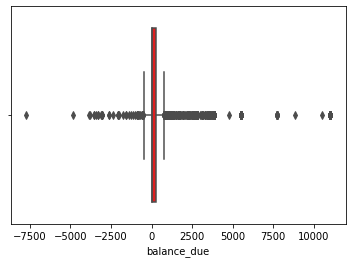

In [78]:
sns.boxplot(data['balance_due'], color='r');

In [86]:
def detect_outlier(dataset):
    qt1, qt3 = np.percentile(dataset, [25, 75])
    return np.where((dataset > qt3 + ((qt3 - qt1) * 1.5)) | (dataset < qt1 - ((qt3 - qt1) * 1.5)))[0]

#### Выбросы:

In [87]:
outliers = detect_outlier(data['balance_due'])
outliers

array([     6,      9,     12, ..., 250259, 250274, 250287])

In [90]:
print('Модуль разницы макс. и мин. выброса = ', np.fabs(max(outliers) - min(outliers)))

Модуль разницы макс. и мин. выброса =  250281.0
